In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("C:/Insurance.csv")

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
d.index

RangeIndex(start=0, stop=1338, step=1)

In [5]:
d.shape

(1338, 7)

In [6]:
d.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
d.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
d['sex'].replace({'male' : 1 , 'female' : 0}, inplace = True )

In [13]:
d['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [14]:
d.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
d['smoker'].replace({'yes' : 1 , 'no' : 0}, inplace = True )

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['re'] = le.fit_transform(d['region'])

In [17]:
d.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
re            int32
dtype: object

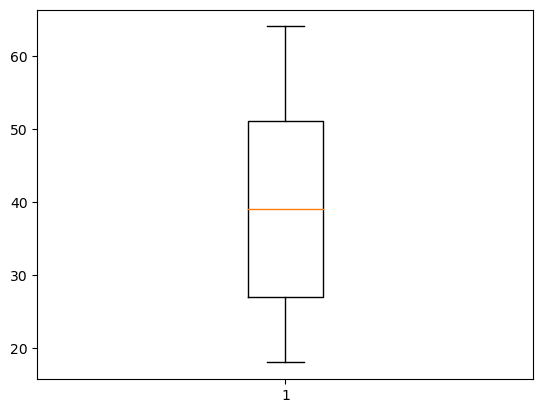

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(d['age'])
plt.show()

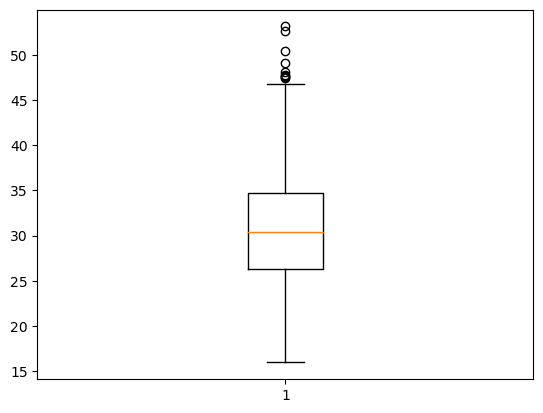

In [19]:
plt.boxplot(d['bmi'])
plt.show()

In [20]:
bmi_df = pd.DataFrame(d['bmi'])
bmi_med = bmi_df.median()
print(bmi_med)

bmi    30.4
dtype: float64


In [21]:
q1 = bmi_df.quantile(q = 0.25)
q3 = bmi_df.quantile(q = 0.75)

IQR = q3 - q1
ll = int(q1 - (1.5*IQR))
ul = int(q3 + (1.5*IQR))

d.loc[d['bmi']< ll, 'bmi'] = int(bmi_df.quantile(q = 0.10))
d.loc[d['bmi']> ul, 'bmi'] = int(bmi_df.quantile(q = 0.90))

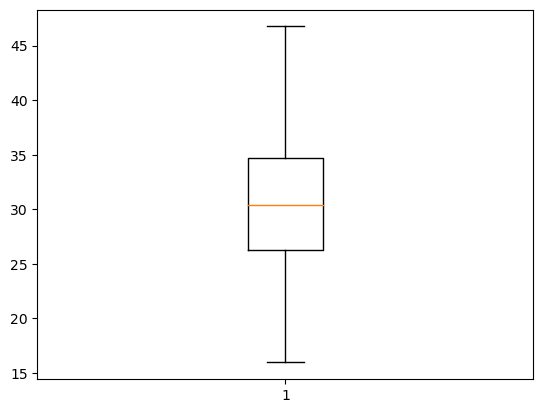

In [22]:
plt.boxplot(d['bmi'])
plt.show()

In [23]:
mat = d.corr()
print(mat)

               age       sex       bmi  children    smoker   charges        re
age       1.000000 -0.020856  0.113953  0.042469 -0.025019  0.299008  0.002127
sex      -0.020856  1.000000  0.042346  0.017163  0.076185  0.057292  0.004588
bmi       0.113953  0.042346  1.000000  0.015792 -0.000144  0.195739  0.157588
children  0.042469  0.017163  0.015792  1.000000  0.007673  0.067998  0.016569
smoker   -0.025019  0.076185 -0.000144  0.007673  1.000000  0.787251 -0.002181
charges   0.299008  0.057292  0.195739  0.067998  0.787251  1.000000 -0.006208
re        0.002127  0.004588  0.157588  0.016569 -0.002181 -0.006208  1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6948\1860008436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = d.corr()


<Axes: >

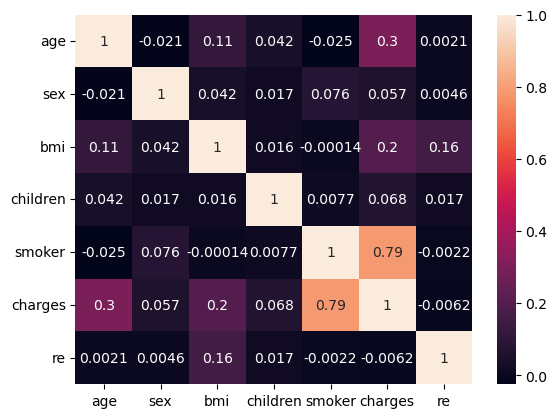

In [24]:
import seaborn as sns
sns.heatmap(data = mat, annot = True)

In [26]:
d.drop('region', axis=1, inplace = True)

In [27]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sd = scaler.fit_transform(d)
sd

nd = pd.DataFrame(sd)
nd.columns = d.columns

In [28]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 're']
result = ['charges'] 

x = nd[features]
y = nd[result]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

xt, xxt, yt, yyt = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(xt, yt)

LinearRegression()

In [30]:
accuracy = model.score(xt, yt)
print(accuracy)

0.7498372814754832


In [31]:
accuracy = model.score(xxt, yyt)
print(accuracy)

0.7540490510053091


In [32]:
y_pred = model.predict(xxt)
a = metrics.r2_score(y_pred, yyt)
print(a)

0.6595475149198353


In [33]:
a = metrics.mean_squared_error(y_pred, yyt)
print(a)

0.010381480694544303


In [34]:
model.intercept_

array([-0.04826628])

In [35]:
model.coef_

array([[ 0.18774912, -0.00342491,  0.16807867,  0.03521325,  0.37974203,
        -0.01660406]])

In [58]:
t_pred = model.predict(xt.iloc[[2]])
t_pred

array([[0.14270668]])

In [42]:
xt.loc[5, :]

age         0.282609
sex         0.000000
bmi         0.317636
children    0.000000
smoker      0.000000
re          0.666667
Name: 5, dtype: float64

In [54]:
xt.iloc[[2]]

,age,sex,bmi,children,smoker,re
536,0.326087,0.0,0.745047,0.6,0.0,1.0


In [55]:
yt.iloc[[2]]

,charges
536,0.077424
